<a href="https://colab.research.google.com/github/yqty/SadTalker/blob/main/sadtalker%E6%94%B9%E8%BF%9B%E7%89%88python310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [4]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.10 1
!python3 --version
!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/yqty/SadTalker.git &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
###!python3 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!apt update
!apt install ffmpeg &> /dev/null
!python3 -m pip install -r requirements.txt
!pip3 install pyngrok
!pip install TTS
!pip install tensorrt


Download models (1 mins)

In [ ]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

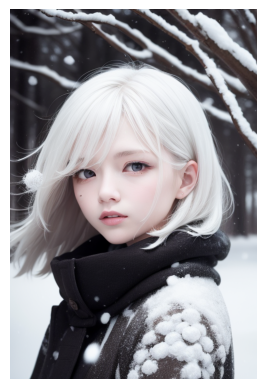

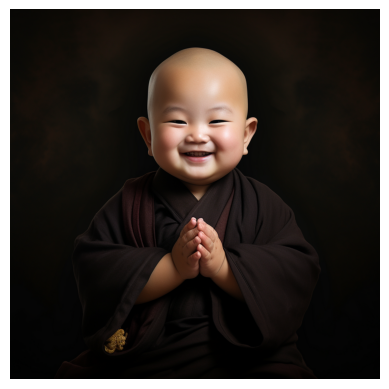

In [6]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [7]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/gcslaoli_Little_monk_big_earlobes_chubby_face_Zen_style_whole_b_9b4d49b6-632a-4a33-85a1-7c839f82613e.png
2023-07-26 10:08:16.351425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00,  9.53it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 18.91it/s]
mel:: 100% 200/200 [00:00<00:00, 18938.05it/s]
audio2exp:: 100% 20/20 [00:00<00:00, 126.76it/s]
Face Renderer:: 100% 100/100 [00:53<00:00,  1.86it/s]
The generated video is named ./results/2023_07_26_10.08.18/gcslaoli_Little_monk_big_earlobes_chubby_face_Zen_style_whole_b_9b4d49b6-632a-4a33-85a1-7c839f82613e##RD_Radio31_000.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 200/200 [00:55<00:00,  3.57it/s]
The generated video is named

In [9]:
# 批量生成语音与图片融合
import os
# 遍历文件夹中的所有音频文件
audio_folder = './examples/driven_audio/'
audio_files = os.listdir(audio_folder)
# 遍历每个音频文件驱动图片生成视频
for audio_file in audio_files:
  audio_path = os.path.join(audio_folder, audio_file)

  img = 'examples/source_image/{}.png'.format(default_head_name.value)
  print(img)
  !python3 inference.py --driven_audio {audio_path} \
  --source_image {img} \
  --result_dir ./results --still --preprocess full --enhancer gfpgan --batch_size 3

IndentationError: ignored

In [8]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2023_07_26_10.08.18.mp4


In [ ]:
!pip install --upgrade joblib torch

In [ ]:
!pip install TTS

In [ ]:
###带外链
!pip3 install pyngrok
!python3 app_sadtalker.py

In [ ]:
!python3 app.py